In [ ]:
!cd ./

In [1]:
!git clone -b master https://github.com/sanchitkadwe/fml-project.git

Cloning into 'fml-project'...
remote: Enumerating objects: 2013, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 2013 (delta 4), reused 3 (delta 0), pack-reused 1997 (from 1)
Receiving objects: 100% (2013/2013), 1.19 GiB | 31.52 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (2002/2002), done.


In [2]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
file_name = "./blues.00000.wav"

In [9]:
y, sampling_rate = librosa.load(file_name,sr=22050)

In [10]:
y , sampling_rate

(array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
        -0.06106567, -0.06417847], dtype=float32),
 22050)

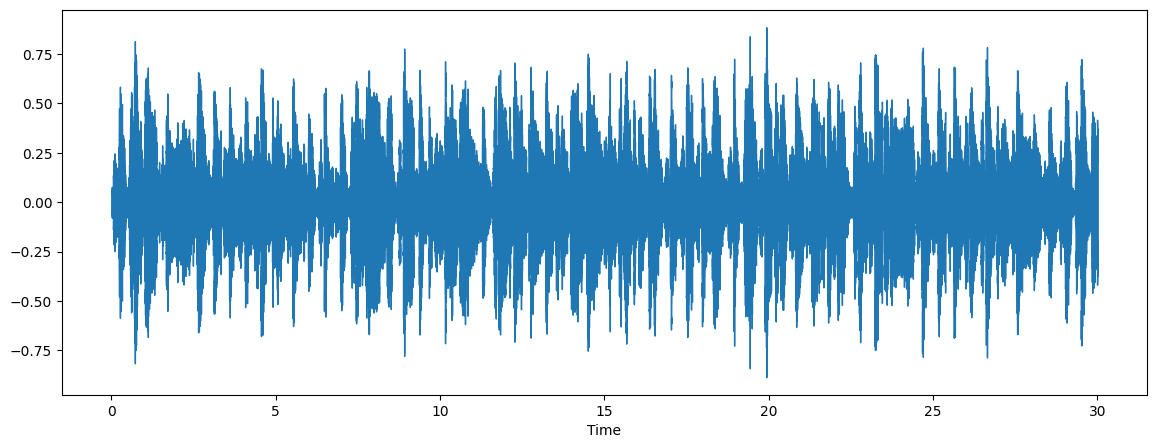

In [11]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(y, sr=sampling_rate)

In [12]:
from IPython.display import Audio
Audio(file_name)

Doing Viz on Chunks

In [13]:
audio_path="./blues.00000.wav"

In [14]:
y,sr = librosa.load(file_name,sr=None)

In [15]:
chunk_duration = 4
overlap_duration = 2

In [16]:
chunk_samples = int(chunk_duration * sr)
overlap_samples = int(overlap_duration * sr)

In [17]:
import numpy as np

In [18]:
num_chunks=int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1

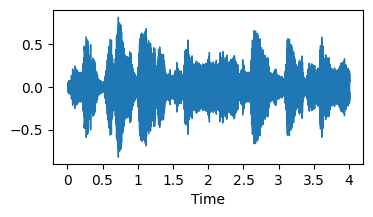

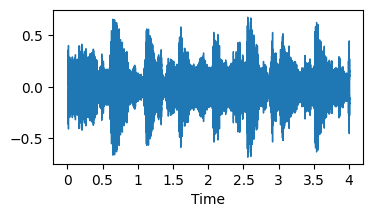

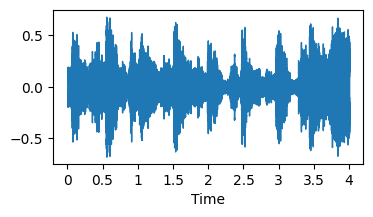

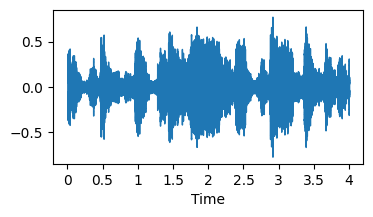

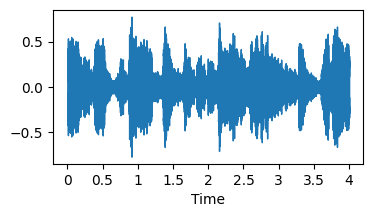

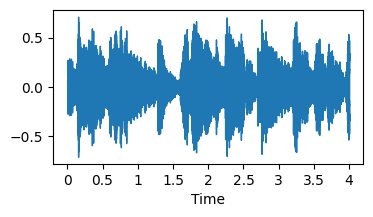

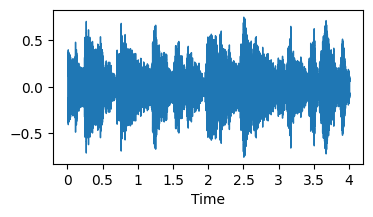

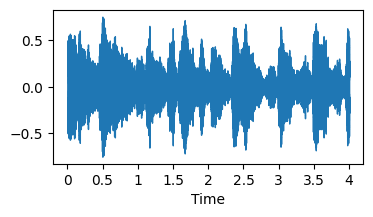

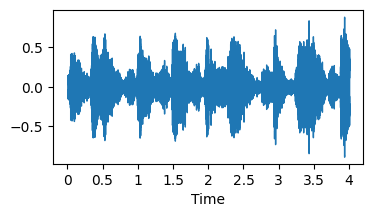

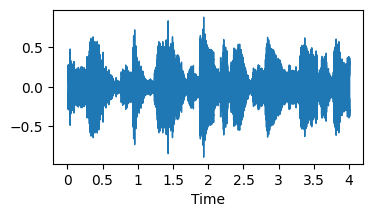

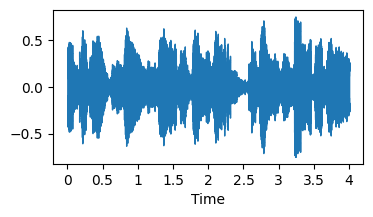

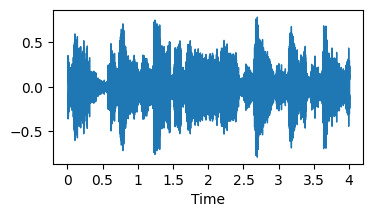

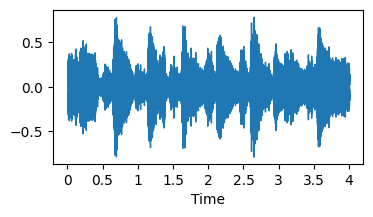

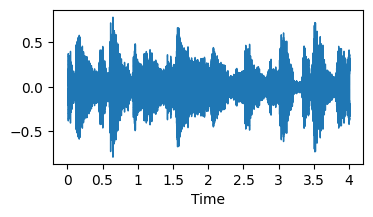

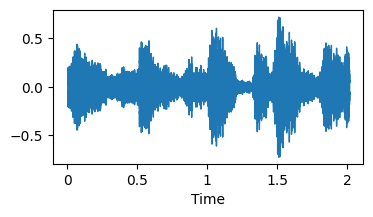

In [19]:
for i in range(num_chunks):
    start_sample = i * (chunk_samples - overlap_samples)
    end_sample = start_sample + chunk_samples
    chunk = y[start_sample:end_sample]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

MelSpectorgram

In [20]:
def plot_mel_spectrogram(y, sr):
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

In [21]:
file_name = "./blues.00000.wav"
y, sampling_rate = librosa.load(file_name,sr=44100)

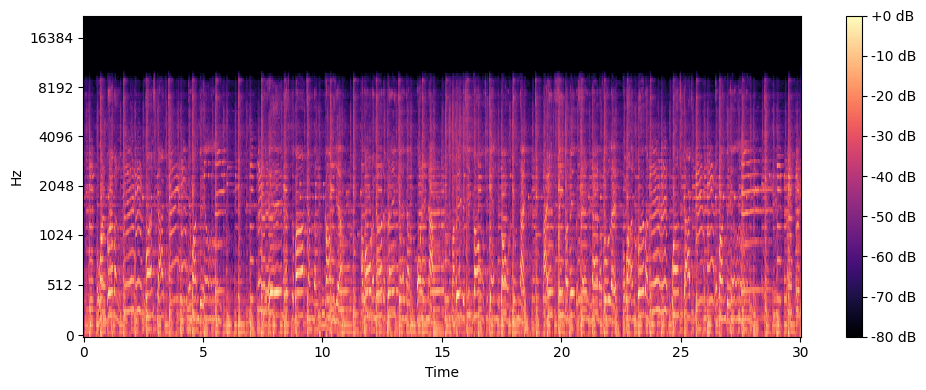

In [22]:
plot_mel_spectrogram(y, sampling_rate)

In [23]:
def plot_mel_spectrogram_chunks(y, sr):
    chunk_duration = 4
    overlap_duration = 2
    chunk_samples = int(chunk_duration * sr)
    overlap_samples = int(overlap_duration * sr)
    num_chunks=int(np.ceil((len(y)-chunk_samples)/(chunk_samples-overlap_samples)))+1
    for i in range(num_chunks):
        start_sample = i * (chunk_samples - overlap_samples)
        end_sample = start_sample + chunk_samples
        chunk = y[start_sample:end_sample]
        mel_spectrogram= librosa.feature.melspectrogram(y=chunk, sr=sr)

        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.tight_layout()
        plt.show()

In [24]:
file_name = "./blues.00000.wav"
y,sr= librosa.load(file_name,sr=44100)

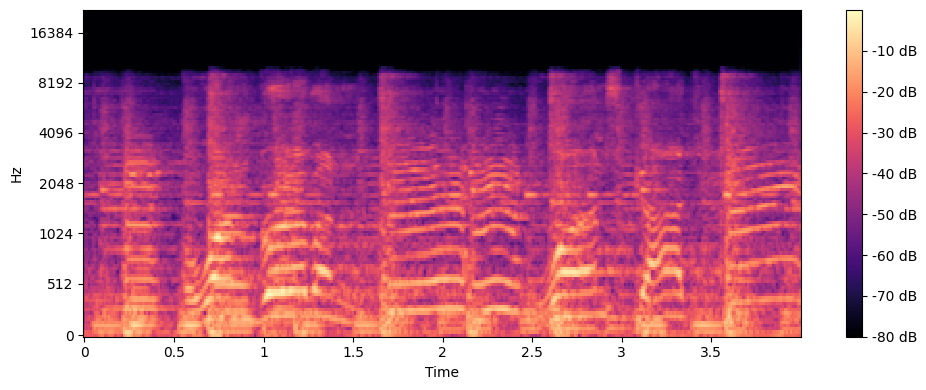

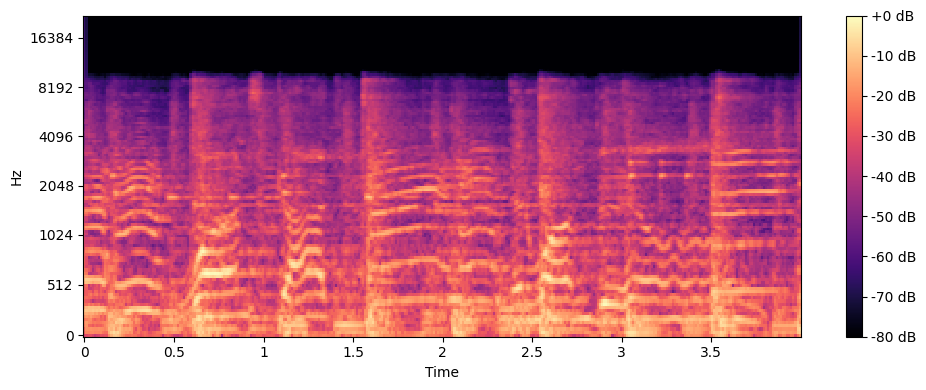

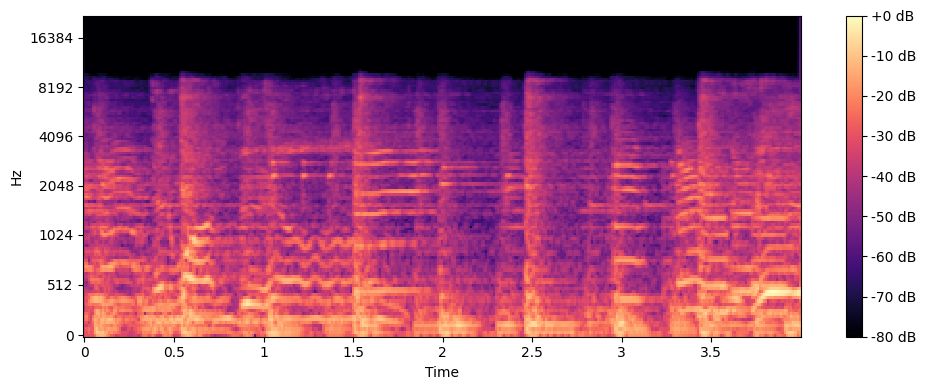

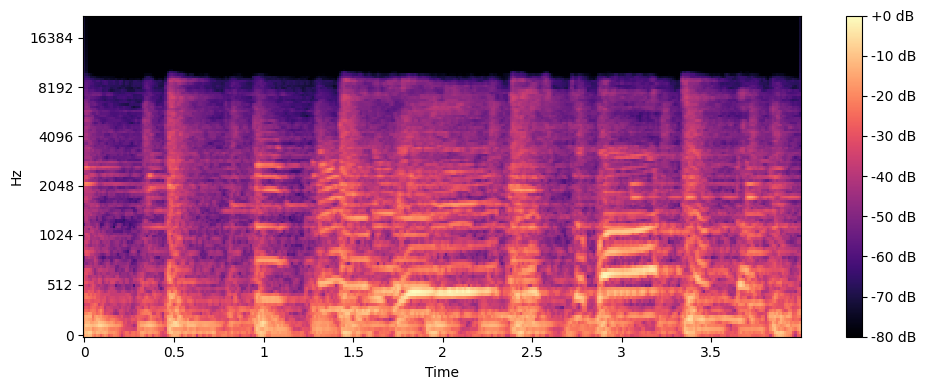

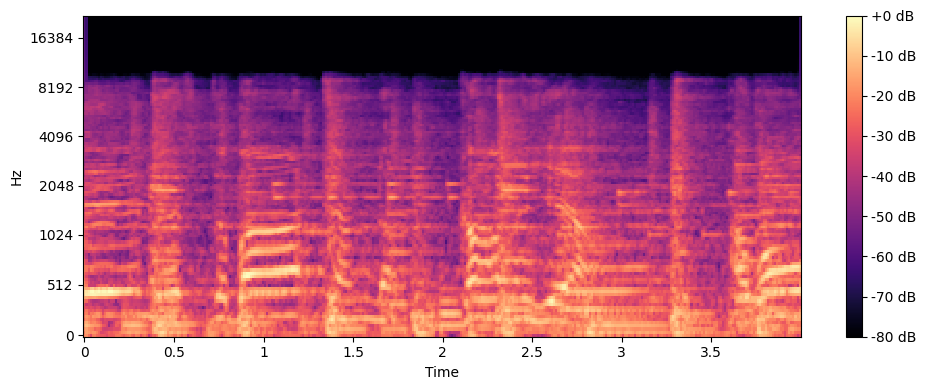

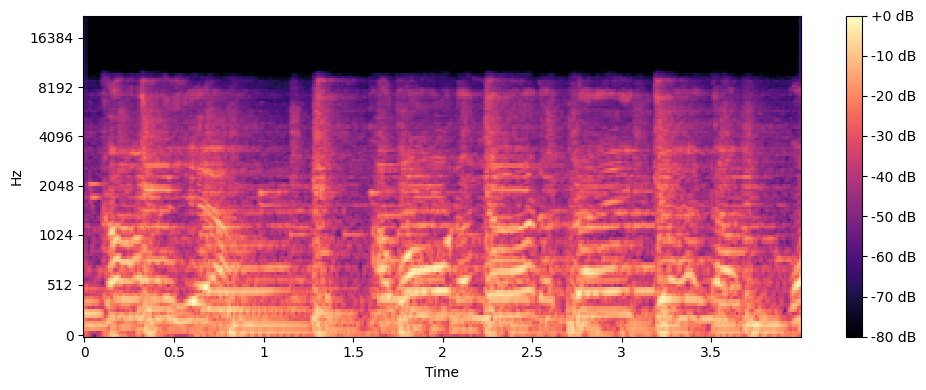

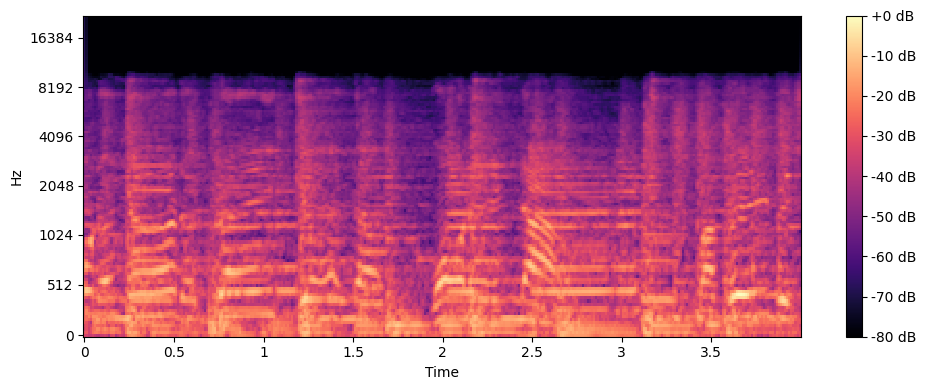

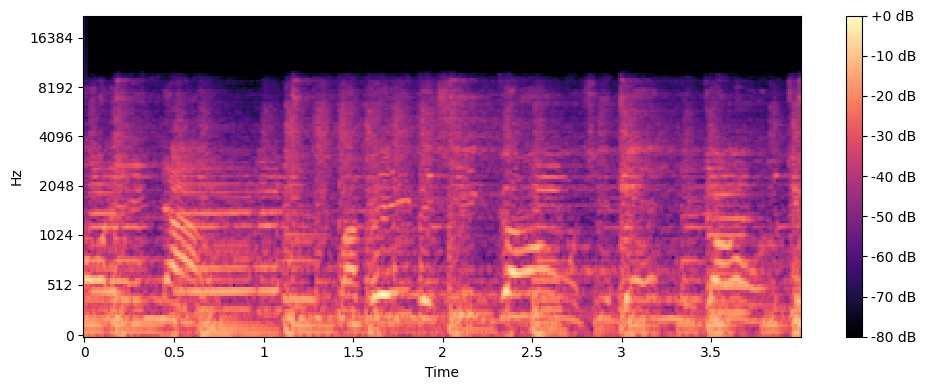

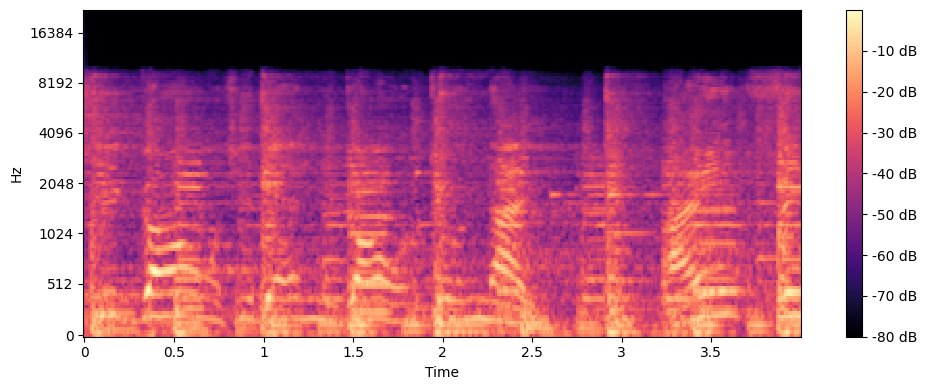

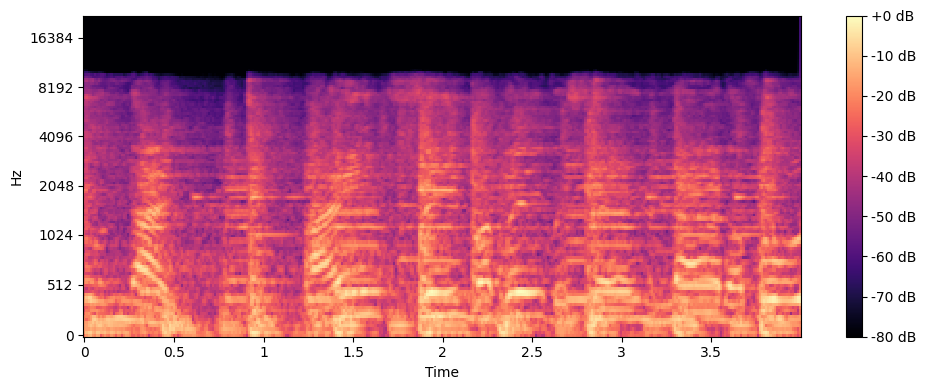

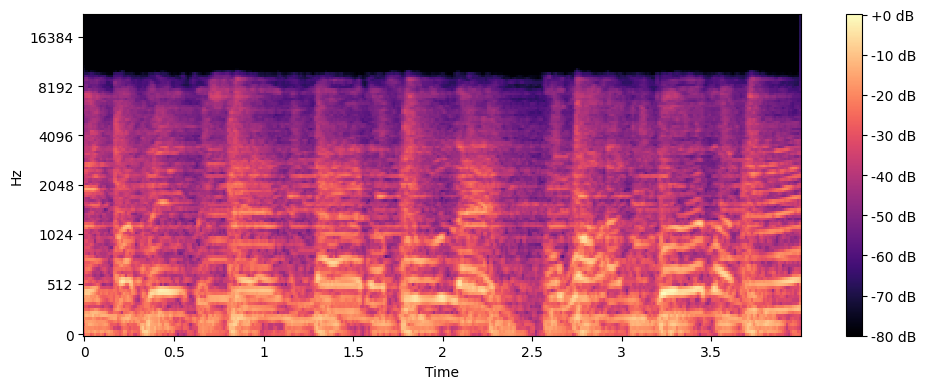

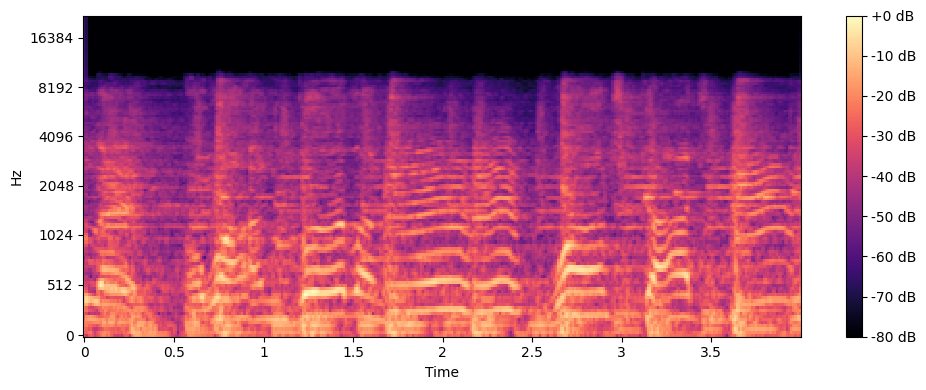

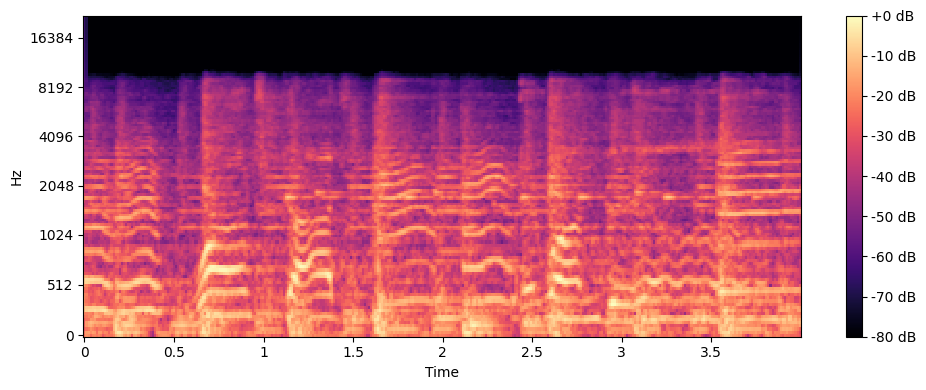

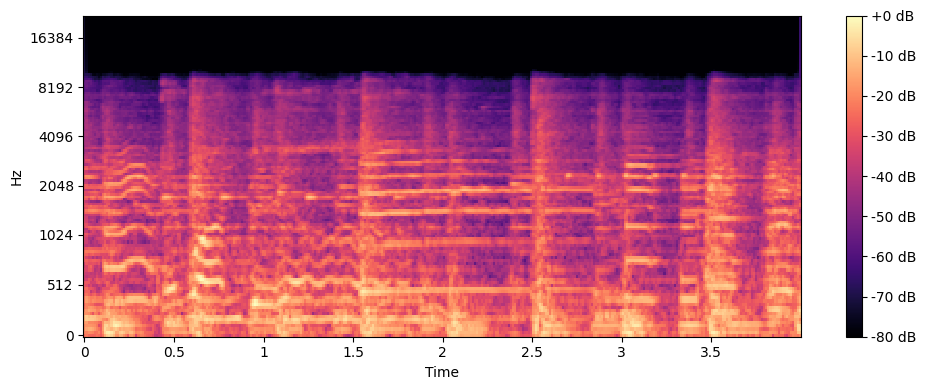

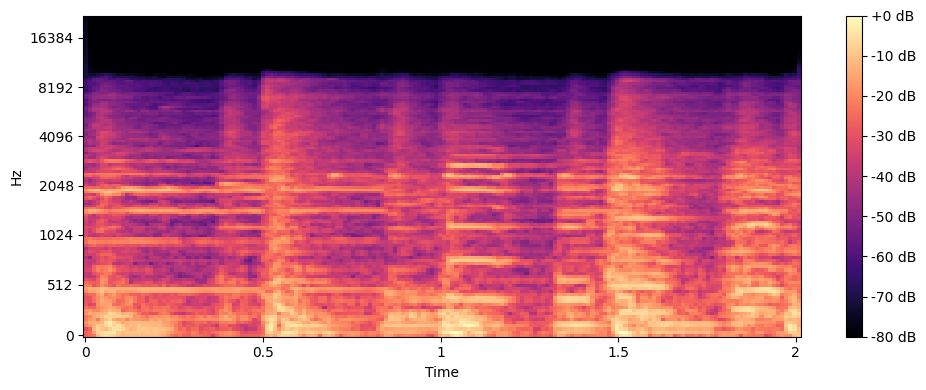

In [25]:
plot_mel_spectrogram_chunks(y,sr)

In [29]:
data_dir = "./genres_original"
classes = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [27]:
def preprocess(data_dir,classes,target_shape=(150,150)):
  data=[]
  labels=[]
  for i_class,class_name in enumerate(classes):
    class_dir = os.path.join(data_dir,class_name)
    print("Data is being Processed: ", class_name)
    for file_name in os.listdir(class_dir):
      if file_name.endswith('.wav'):
        file_path = os.path.join(class_dir,file_name)
        audio_data,sample_rate = librosa.load(file_path,sr=None)
        chunk_duration = 4
        overlap_duration = 2
        chunk_samples = int(chunk_duration * sample_rate)
        overlap_samples = int(overlap_duration * sample_rate)
        num_chunks=int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples-overlap_samples)))+1
        for i in range(num_chunks):
            start_sample = i * (chunk_samples - overlap_samples)
            end_sample = start_sample + chunk_samples
            chunk = audio_data[start_sample:end_sample]
            mel_spectrogram= librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
            mel_spectrogram = tf.expand_dims(mel_spectrogram, axis=-1)
            mel_spectrogram = tf.image.resize(mel_spectrogram,target_shape)
            data.append(mel_spectrogram)
            labels.append(i_class)
  return np.array(data),np.array(labels)




In [30]:
data,labels = preprocess(data_dir,classes)

Data is being Processed:  blues
Data is being Processed:  classical
Data is being Processed:  country
Data is being Processed:  disco
Data is being Processed:  hiphop
Data is being Processed:  jazz
Data is being Processed:  metal
Data is being Processed:  pop
Data is being Processed:  reggae
Data is being Processed:  rock


In [ ]:
!pip install tensorflow
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes=len(classes))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(data,labels,test_size=0.2, random_state=42)

MODEL

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
model = tf.keras.models.Sequential()


In [ ]:
model.add(Conv2D( filters=32,kernel_size=3,padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D( filters=32,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
model.add(Conv2D( filters=64,kernel_size=3,padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D( filters=64,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
model.add(Conv2D( filters=128,kernel_size=3,padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D( filters=128,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
model.add(Dropout(0.3))

In [ ]:
model.add(Conv2D( filters=256,kernel_size=3,padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D( filters=256,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
model.add(Conv2D( filters=512,kernel_size=3,padding='same', activation='relu', input_shape=X_train[0].shape))
model.add(Conv2D( filters=512,kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))


In [ ]:
model.add(Dropout(0.3))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1200, activation='relu'))
model.add(Dropout(0.45))

In [ ]:
model.add(Dense(units=len(classes), activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy','categorical_accuracy'])

In [ ]:
training_log= model.fit(X_train,Y_train,batch_size=32,epochs=30,validation_data=(X_test,Y_test))

In [ ]:
model.save("Model.h5")

In [ ]:
training_log.history

In [ ]:
import json
with open("training_log.json","w") as f:
  json.dump(training_log.history,f)

In [ ]:
model = tf.keras.models.load_model("Model.h5")
model.summary

In [ ]:
import json
with open("training_log.json","r") as f:
  training_log = json.load(f)

Evaluation

In [ ]:
train_loss,train_acc,train_cat_acc = model.evaluate(X_train,Y_train)

In [ ]:
val_loss,val_acc,val_cat_acc = model.evaluate(X_test,Y_test)

Viz

In [ ]:
#Loss
epochs= [i for i in range(1,31)]
plt.plot(epochs,training_log['loss'],label='Training Loss',color='red')
plt.plot(epochs,training_log['val_loss'],label='Validation Loss',color='blue')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.show()

In [ ]:
#Accuracy
epochs= [i for i in range(1,31)]
plt.plot(epochs,training_log['accuracy'],label='Training Accuracy',color='red')
plt.plot(epochs,training_log['val_accuracy'],label='Validation Accuracy',color='blue')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.show()

In [ ]:
y_pred=model.predict(X_test)
y_pred

In [ ]:
predictions = np.argmax(y_pred,axis=1)
predictions

In [ ]:
true_labels = np.argmax(Y_test,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_labels,predictions)
print(classification_report(true_labels,predictions,target_names=classes))

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',xticklabels=classes,yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()